# Sales Forecast
![](https://assets.website-files.com/60e7f71b22c6d0b9cf329ceb/621e1a2f28ded71ee95aeede_6ProvenSalesForecastingMethodstoDriveRevenue1_a117440b5ae227c3dba5264a6521da06_2000.png)

* [This project follows the big-mart-sales-analysis project which showed insights and recommendations about best practices to get more sales when opening a new store.](https://github.com/Ziadashraf301/Big-mart-sales-analysis/blob/ef939e3dc1eada7dfff74a0c5a1ad33780c88f7e/README.md)

* The project about predicting these sales using:
    - Decisiontreeregressor
    - Randomforestregressor
    - Xgbregressor
    - Linear regression.


# Outline
* [Importing Libraries](#importing-libraries)
* [Loading dataset](#loading-dataset)
* [Data exploration](#data-exploration)
    - [Correlation](#correlation)
    - [Regression model exploration](#regression-model-exploration)
    - [Check for outliers](#check-for-outliers)
    - [Data distribution](#data-distribution)
* [Data preprocessing](#data-preprocessing)
    - [Handling outliers](#handling-outliers)
    - [Features selection](#features-selection)
    - [Dummy variables](#dummy-variables)
    - [Standardization](#standardization)
* [Model building](#model-building)
    - [Decisiontreeregressor](#1-decisiontreeregressor)
    - [Randomforestregressor](#2-randomforestregressor)
    - [Xgbregressor](#3-xgbregressor)
    - [Linear regression](#4-linearregression)


## Importing Libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')
sb.set(style="darkgrid", color_codes=True)
import statsmodels.api as sms
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Loading Dataset

In [2]:
Big_mart = pd.read_csv('E:/FCDS/August activities/Big mart/Big mart sales analysis.csv')
Big_mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA12,11.60,Low fat,0.066132,Soft Drinks,141.62,OUT045,2002,Tier 2,Supermarket Type1,3829.02
1,DRA12,11.60,Low fat,0.041178,Soft Drinks,140.32,OUT017,2007,Tier 2,Supermarket Type1,2552.68
2,DRA12,11.60,Low fat,0.040912,Soft Drinks,142.32,OUT013,1987,Tier 3,Supermarket Type1,2552.68
3,DRA12,11.60,Low fat,0.066132,Soft Drinks,141.92,OUT035,2004,Tier 2,Supermarket Type1,992.71
4,DRA12,11.60,Low fat,0.041113,Soft Drinks,142.02,OUT018,2009,Tier 3,Supermarket Type2,850.89
...,...,...,...,...,...,...,...,...,...,...,...
8518,NCZ54,14.65,Low fat,0.083359,Household,161.96,OUT046,1997,Tier 1,Supermarket Type1,4711.20
8519,NCZ54,14.65,Low fat,0.083699,Household,163.46,OUT018,2009,Tier 3,Supermarket Type2,2599.28
8520,NCZ54,14.65,Low fat,0.083528,Household,162.46,OUT045,2002,Tier 2,Supermarket Type1,2274.37
8521,NCZ54,14.65,Low fat,0.066132,Household,161.56,OUT010,1998,Tier 3,Grocery Store,324.91


## Data Exploration

In [3]:
Big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [4]:
list(Big_mart)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

### Correlation

<AxesSubplot:>

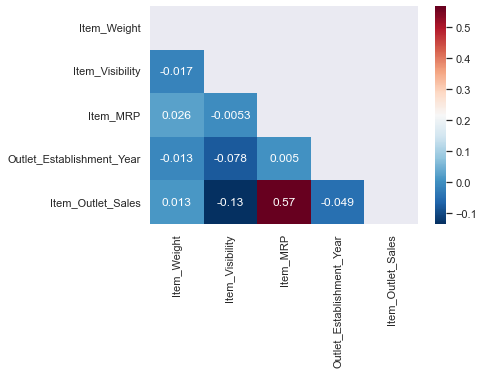

In [5]:
# Correlation matrix
mask = np.triu(np.ones_like(Big_mart.corr()))
sb.heatmap(Big_mart.corr(), cmap='RdBu_r', annot=True,mask=mask)

The Item_MRP has a high positive correlation = 0.57 with the item outlet sales, indicating that it should be used in the model.

### Regression model exploration

In [6]:
num_cols = [cname for cname in Big_mart.columns if Big_mart[cname].dtype!='object']
obj_cols = [cname for cname in Big_mart.columns if Big_mart[cname].dtype=='object']
print('Numerical features: ', num_cols)
print('Objects features: ', obj_cols)
vars = ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type']

Numerical features:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Objects features:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']


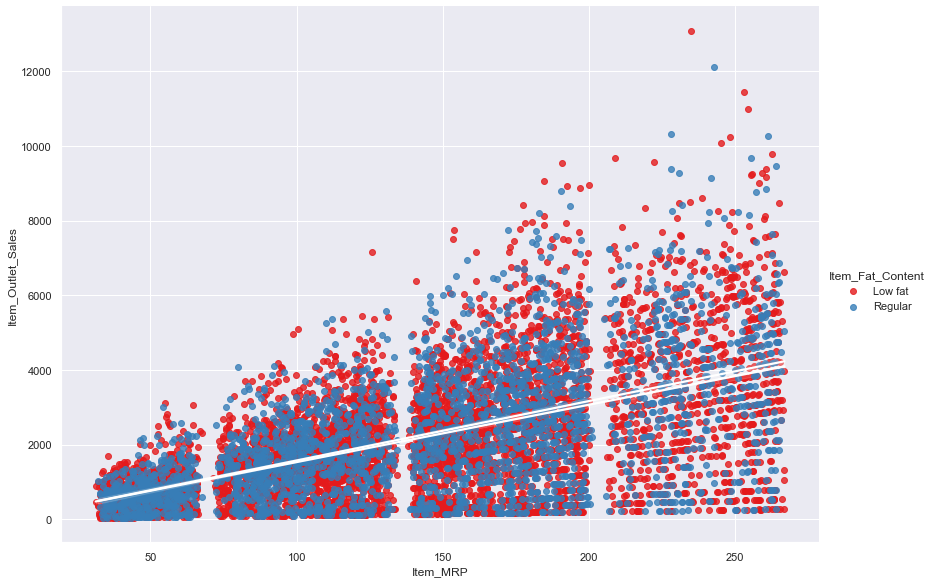

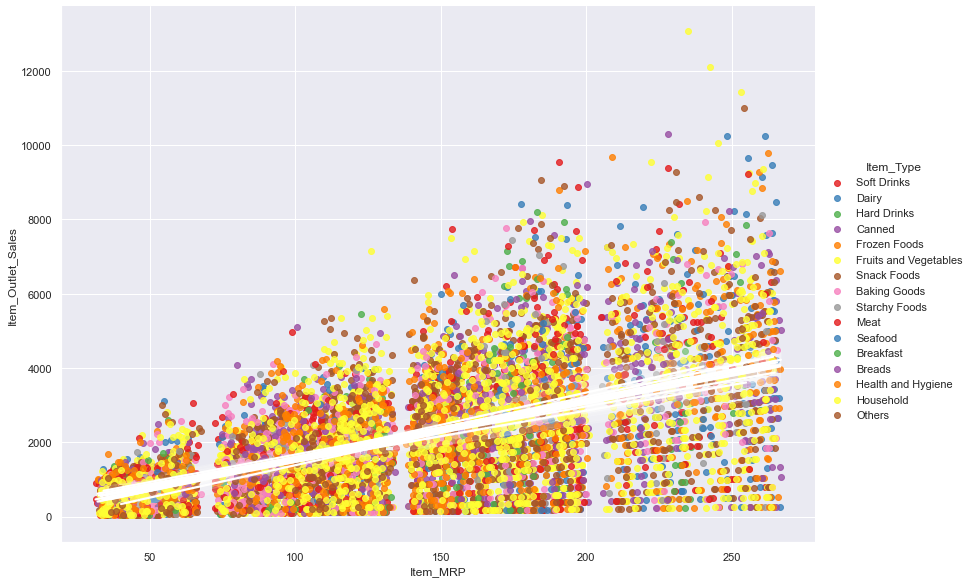

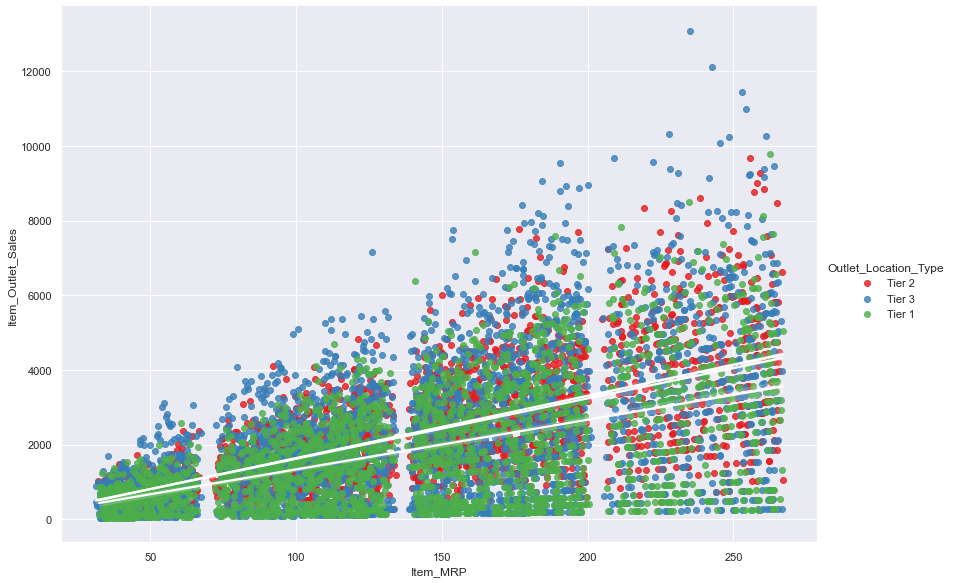

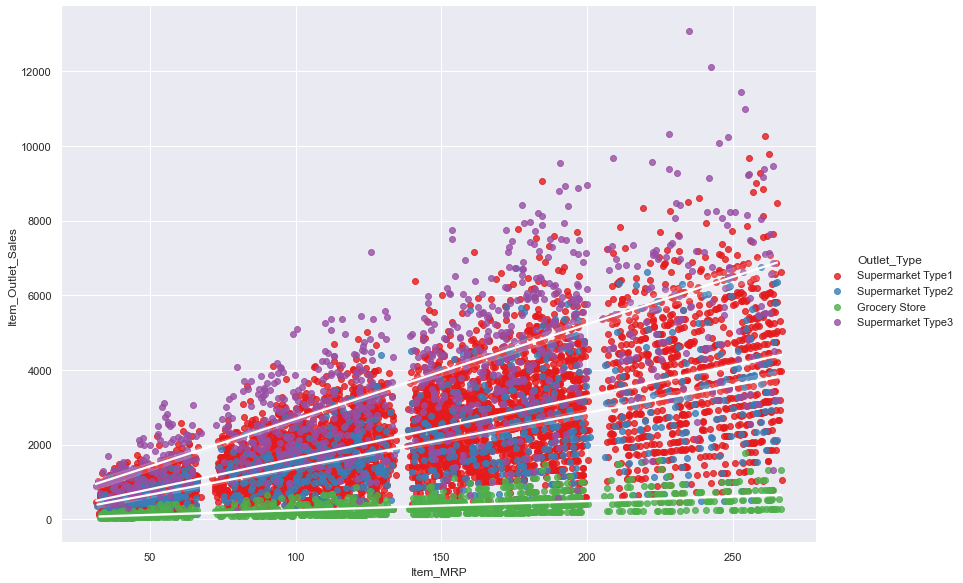

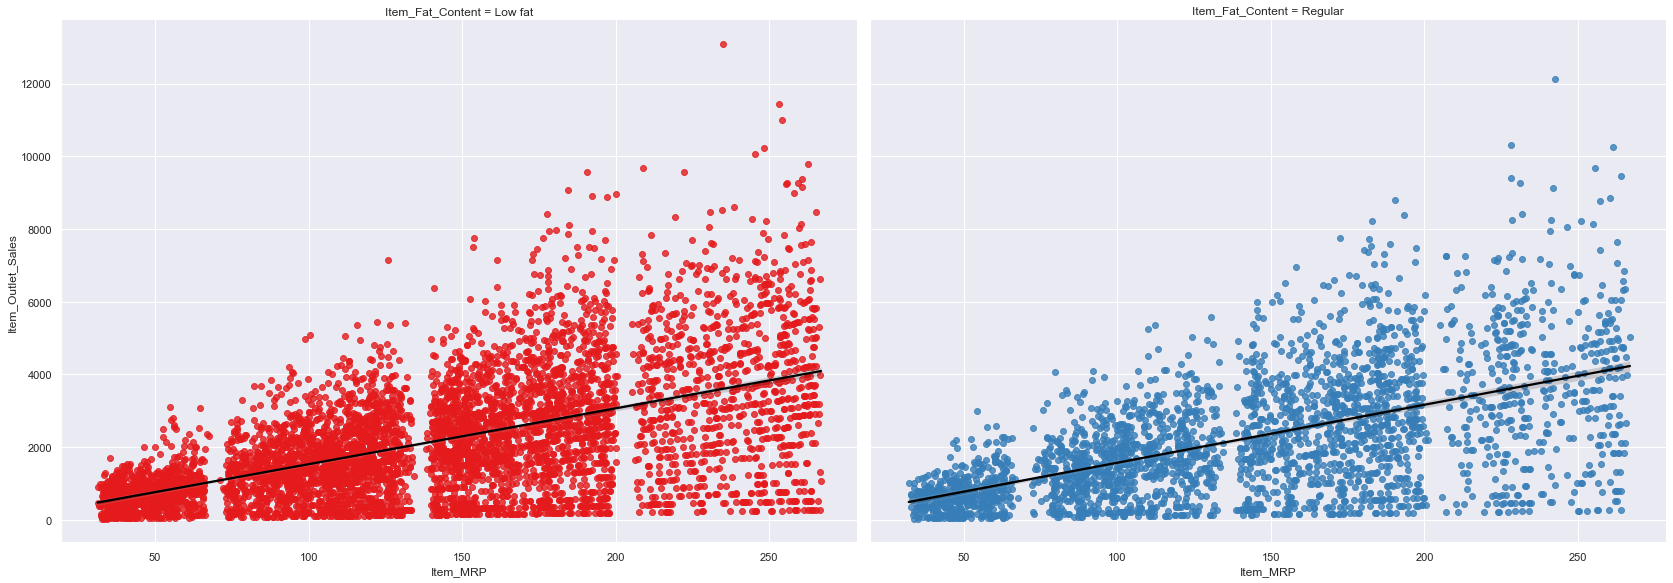

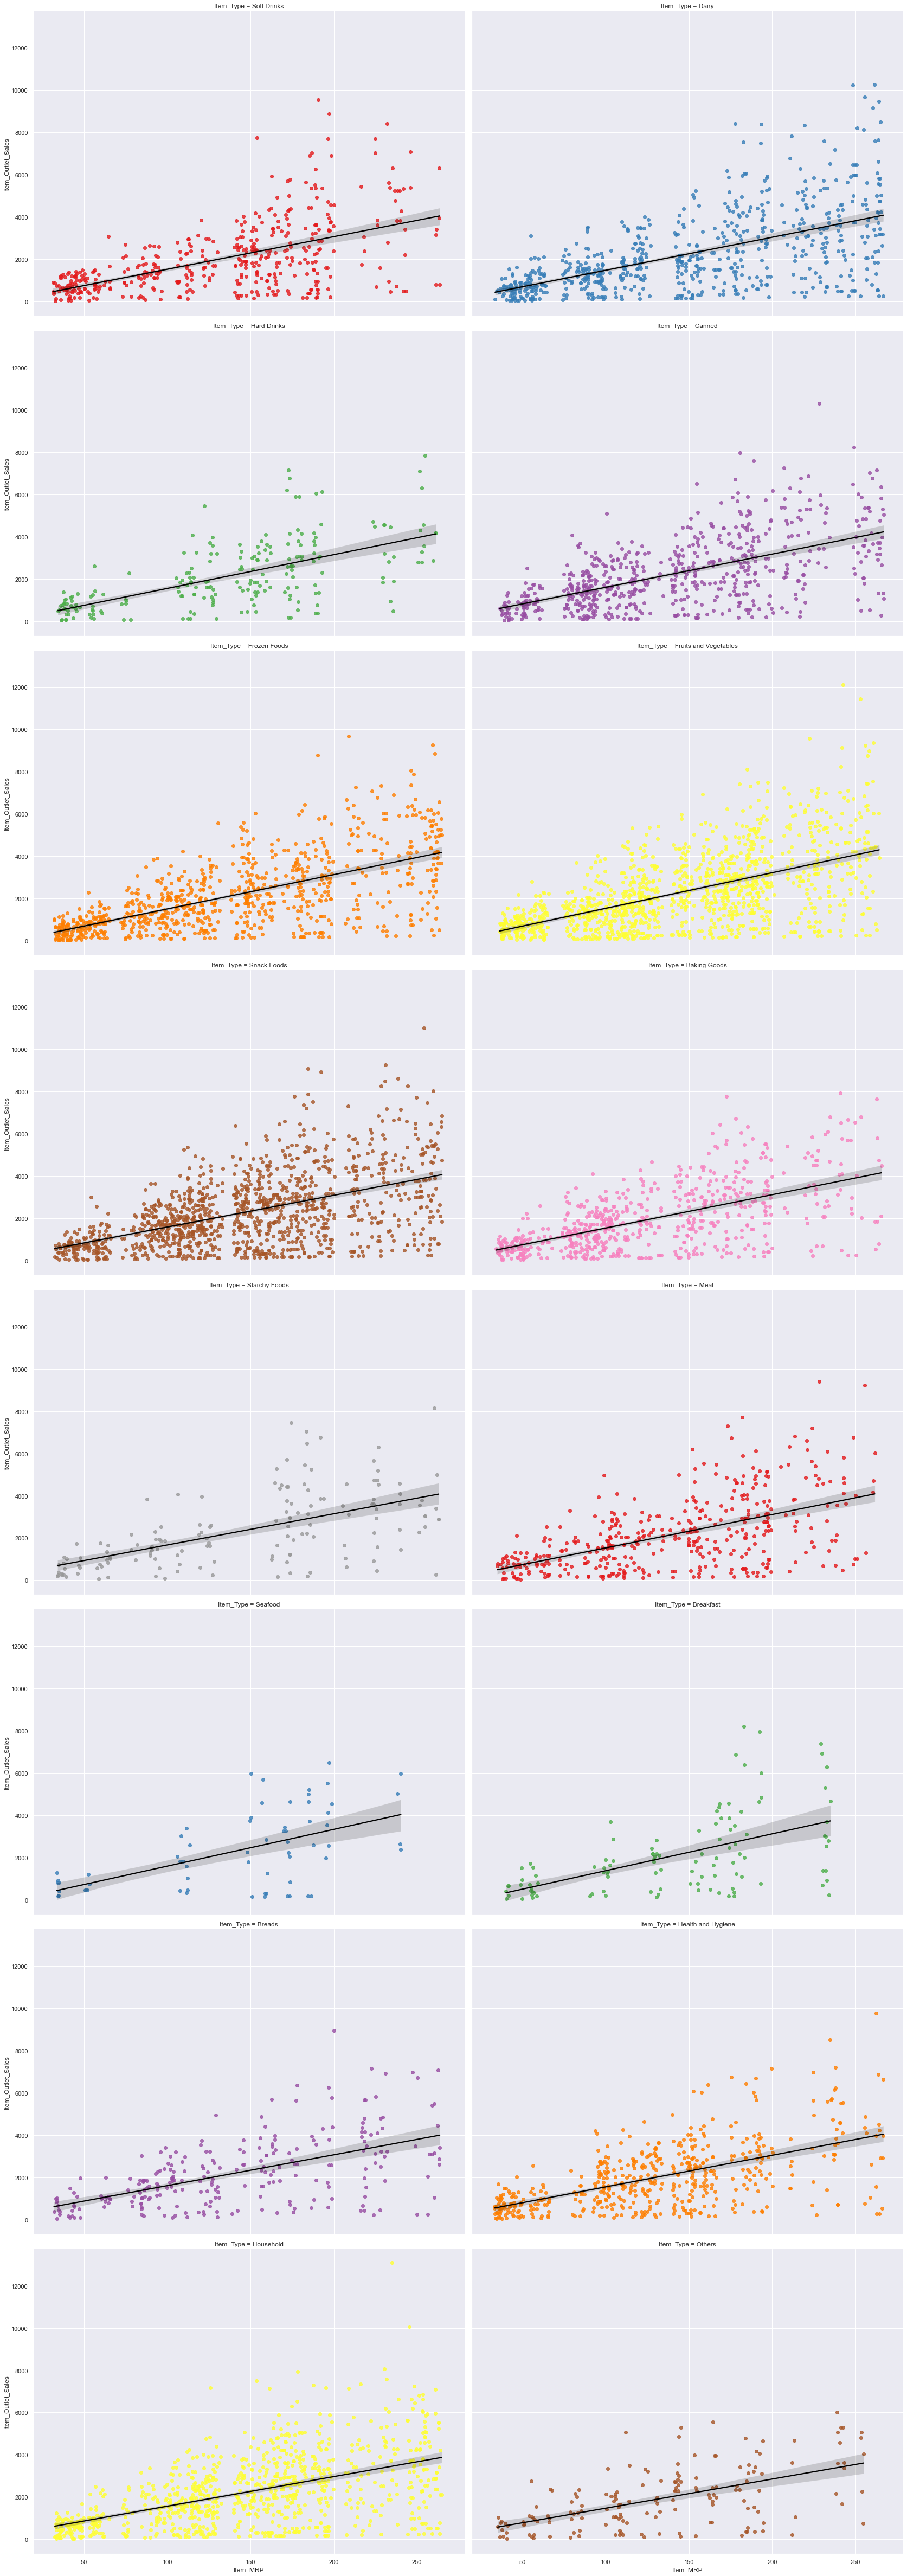

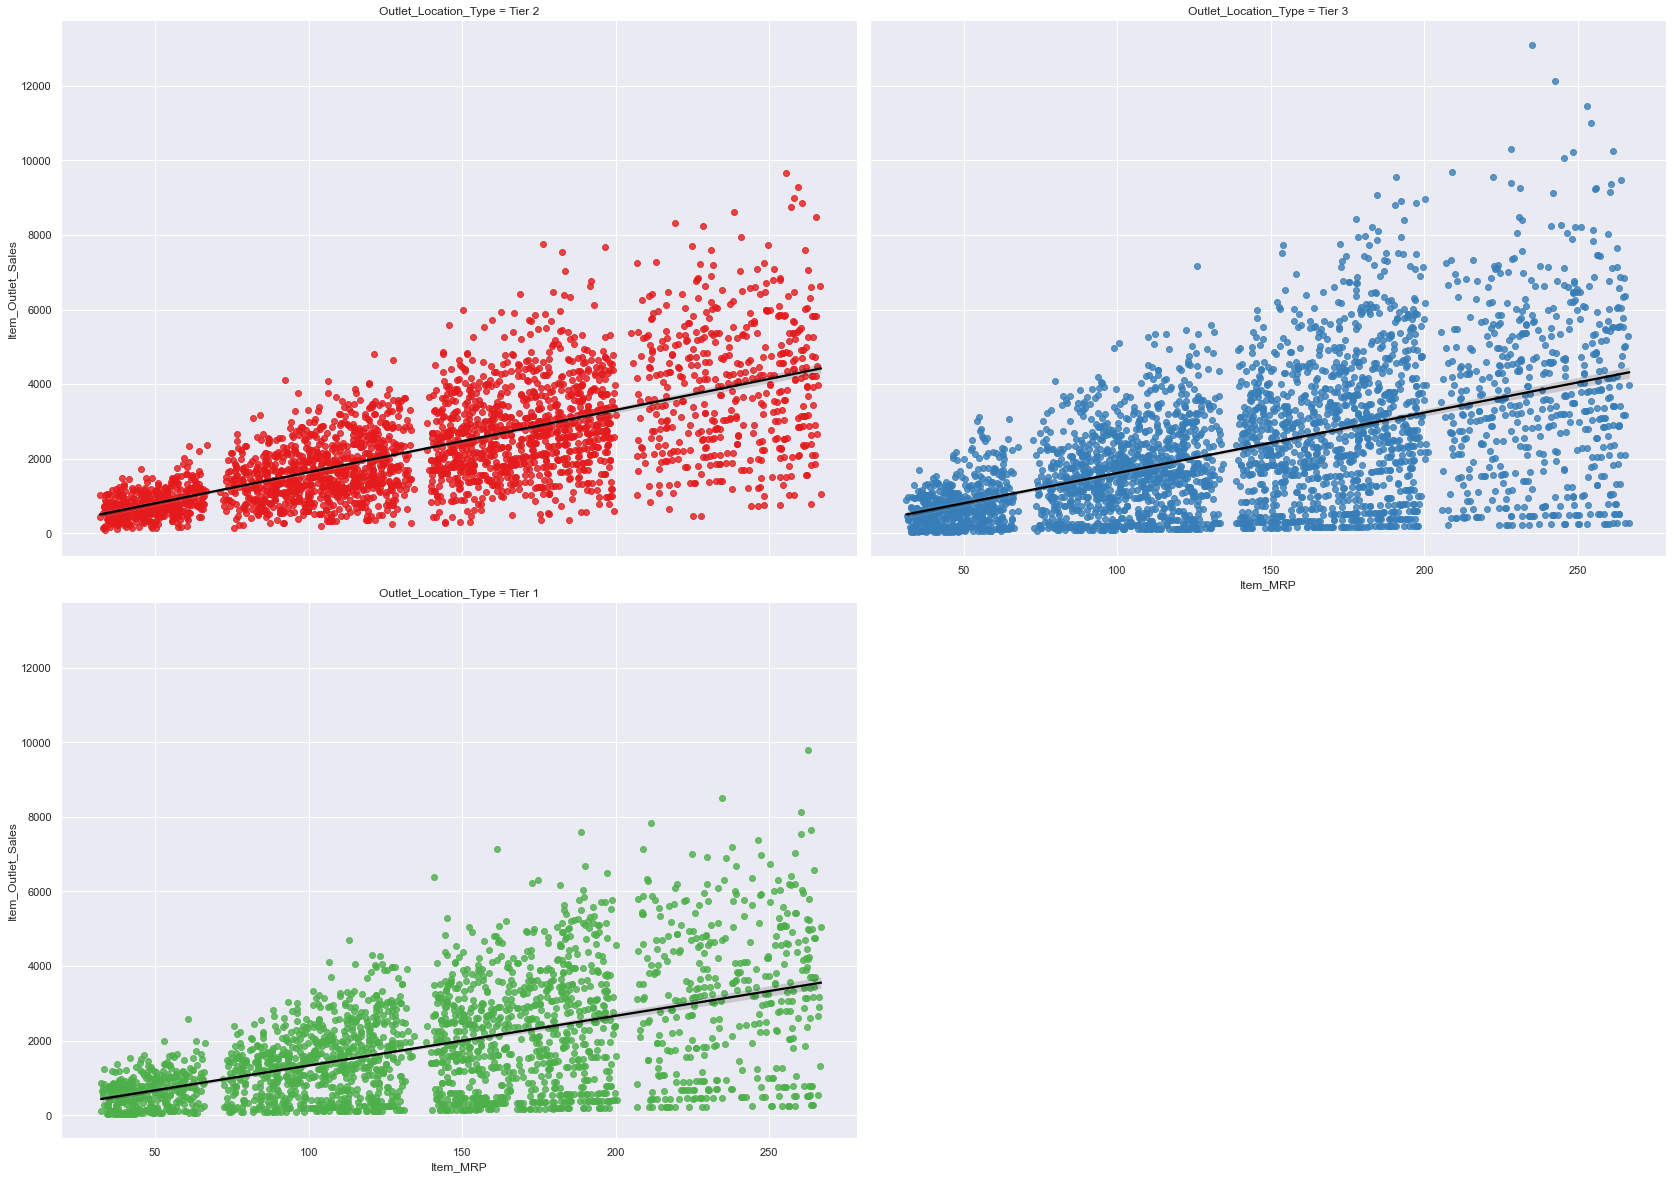

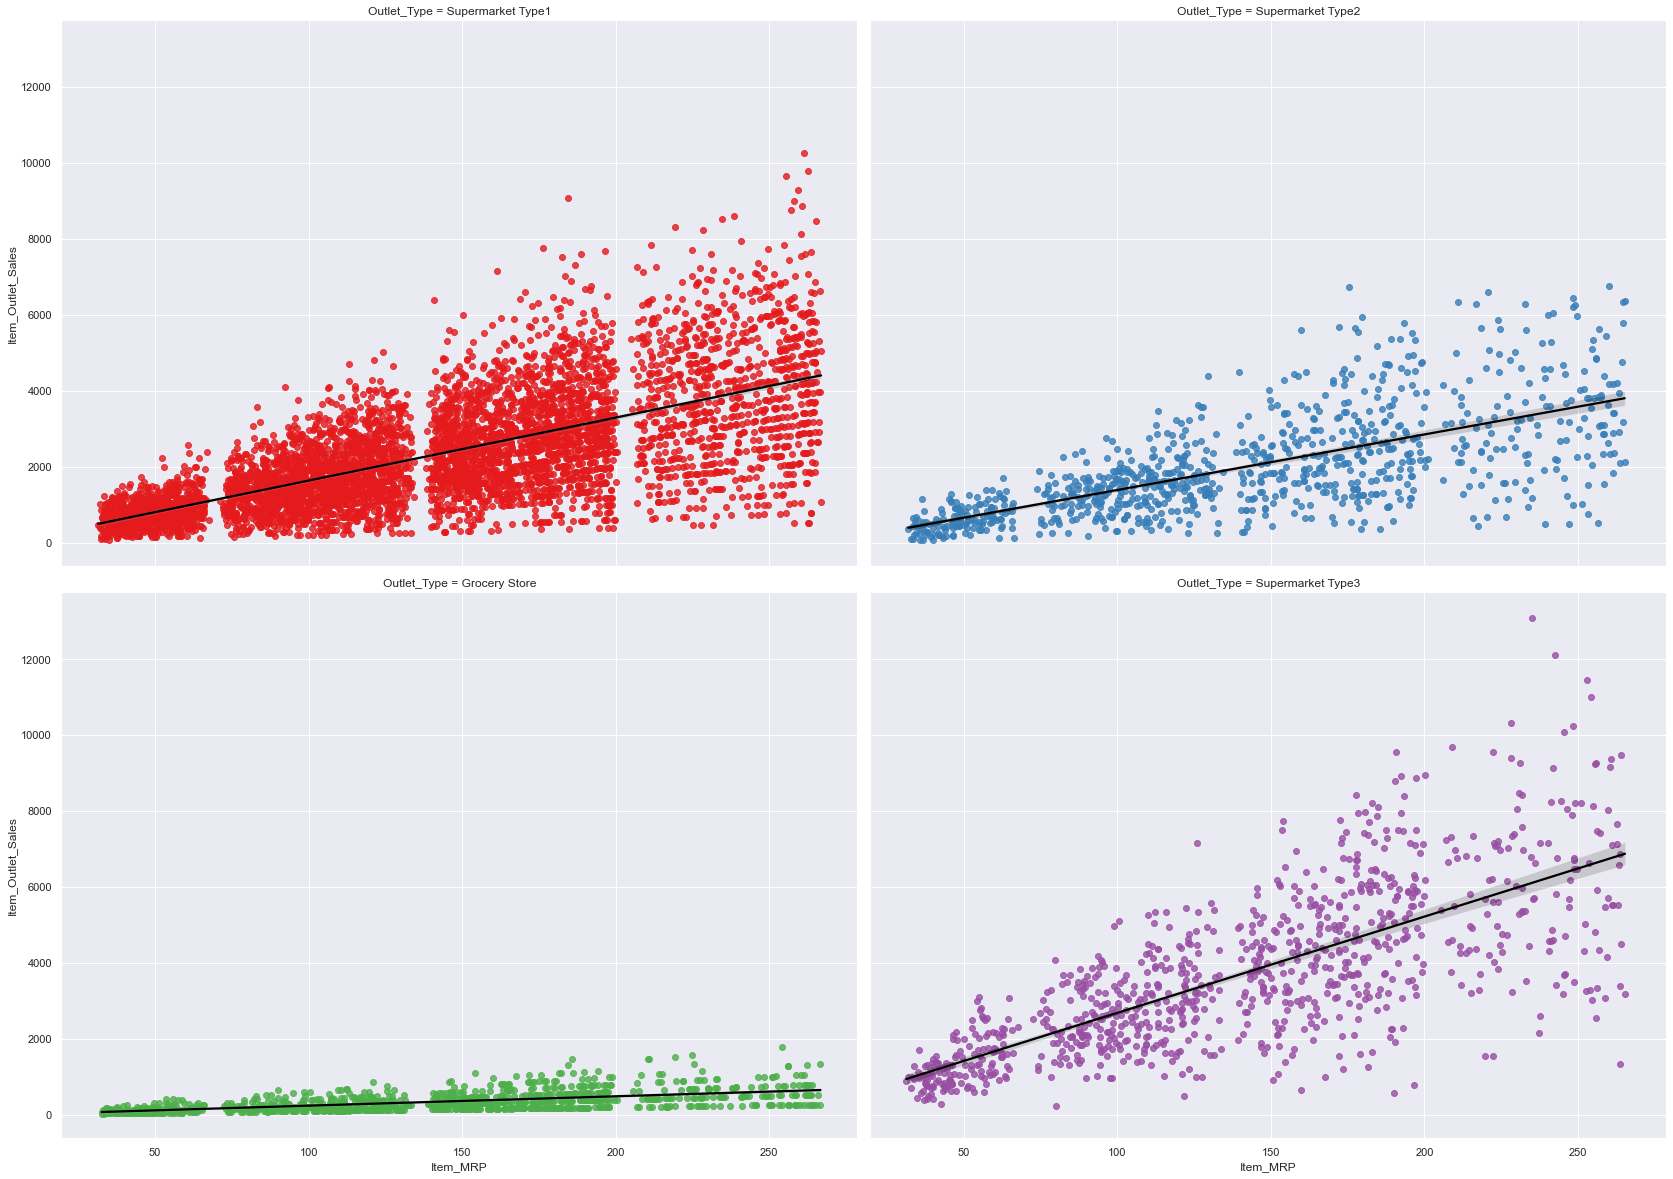

In [7]:
# Scatter to find the second feature that influences sales, including the MRP.

for colu in vars:
    sb.lmplot(x="Item_MRP", y="Item_Outlet_Sales", data=Big_mart,hue=colu, palette="Set1",line_kws={'color': 'white'}, height=8.27, aspect=11.7/8.27);

for colu in vars:
    sb.lmplot(x="Item_MRP", y="Item_Outlet_Sales", data=Big_mart,hue=colu,col=colu,col_wrap=2, palette="Set1",line_kws={'color': 'Black'}, height=8.27, aspect=11.7/8.27);

The scatter plots can't illustrate which features are the best for the model. So the data need to a feature selection method to detect which attribute is more important than another.

### Check for outliers

c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ZIAD\anaconda3\lib\site-p

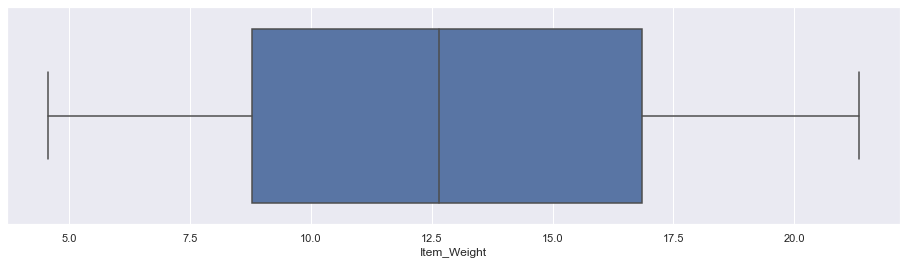

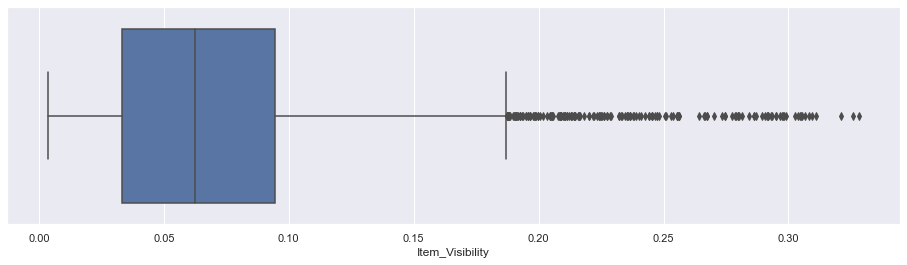

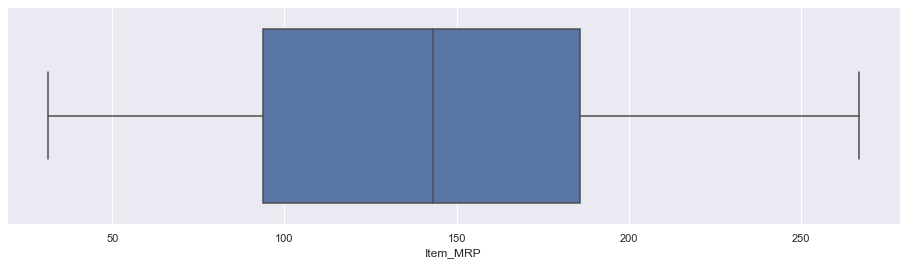

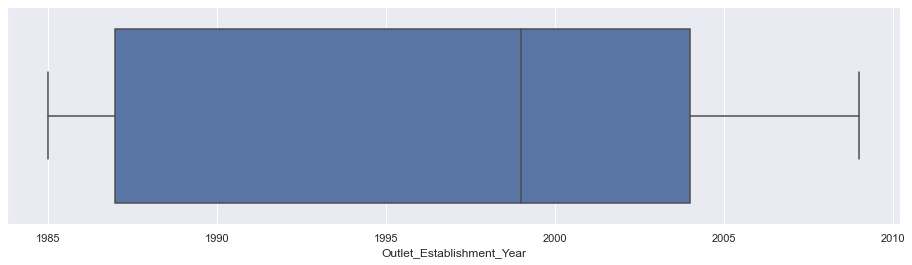

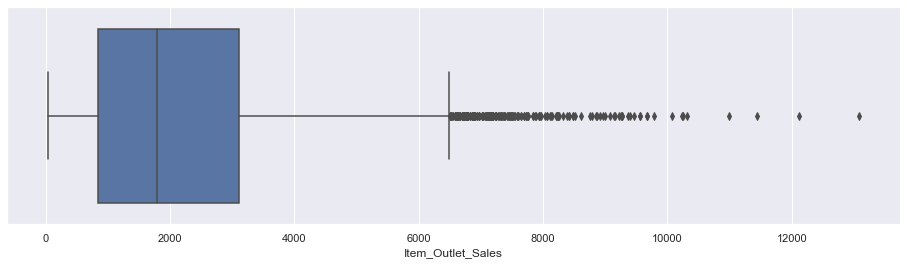

In [8]:
for column in num_cols:
    plt.figure(figsize=(16, 4))
    sb.boxplot(Big_mart[column])

The item_visibility and item_sales have many outliers that should be handled to get a more accurate model.

### Data distribution

c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

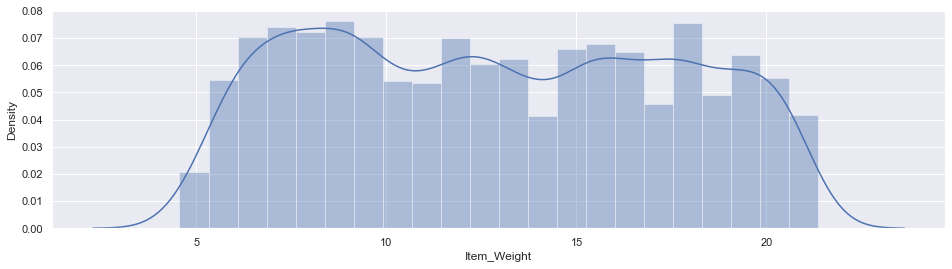

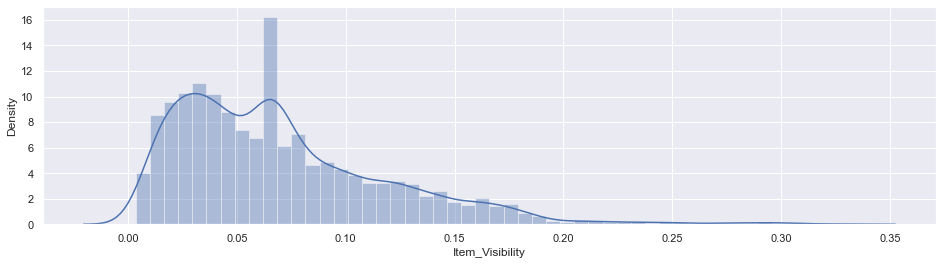

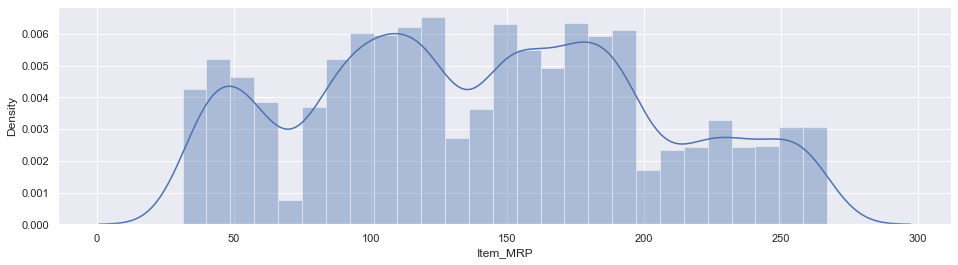

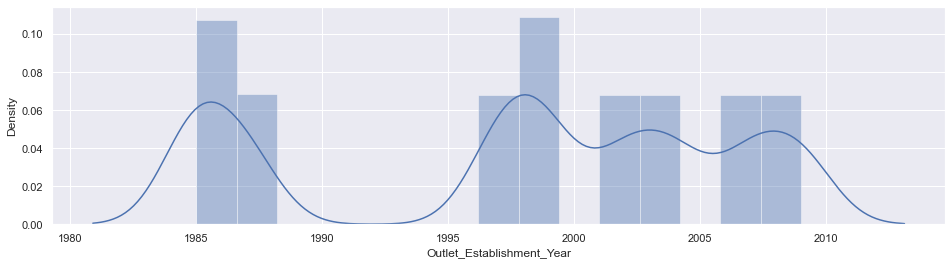

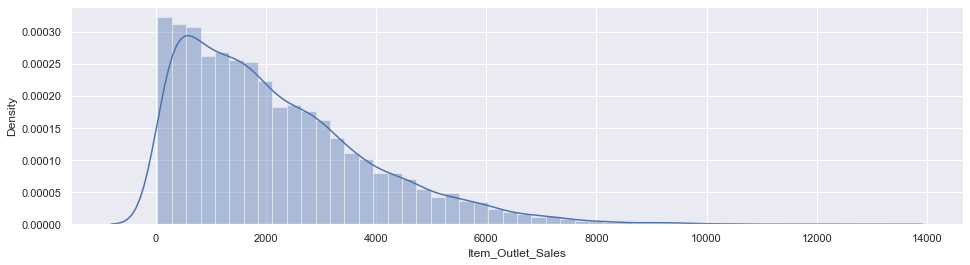

In [9]:
for column in num_cols:
    plt.figure(figsize=(16, 4))
    sb.distplot(Big_mart[column])

All the numerical features don't distribute normally. The item_outlet_sales needs to be transformed to normal distribution.

## Data preprocessing


### Handling outliers

c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ZIAD\anaconda3\lib\site-p

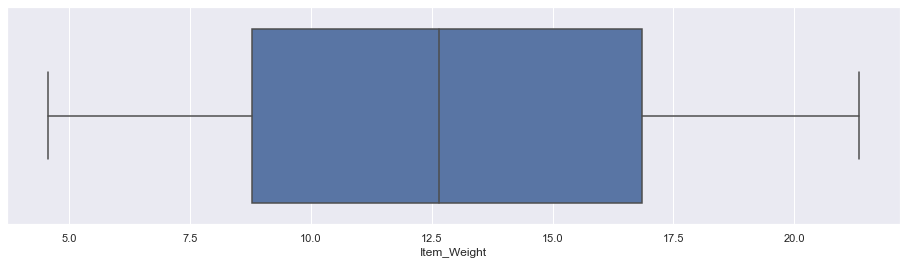

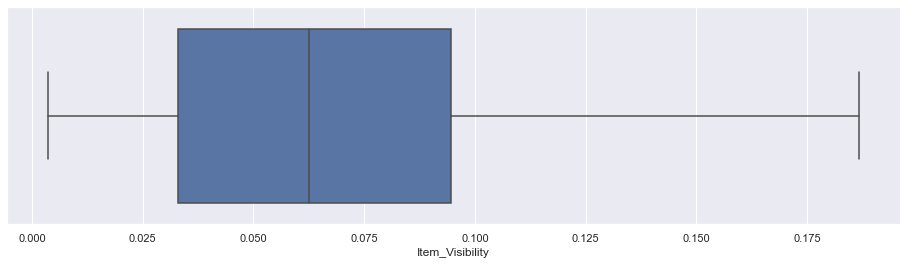

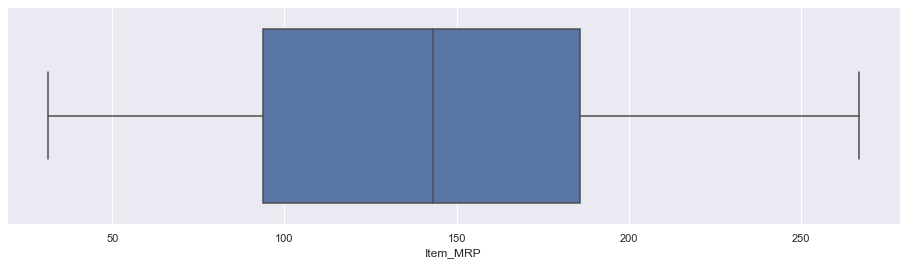

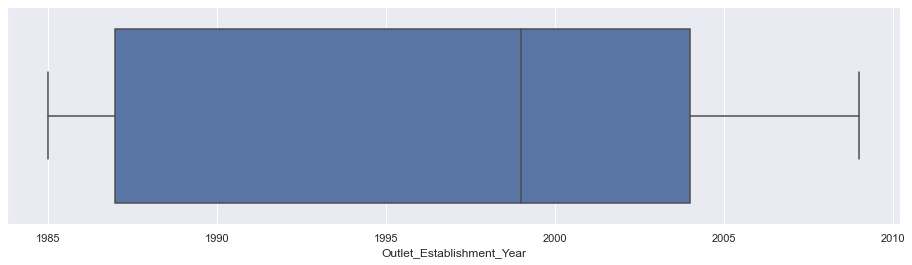

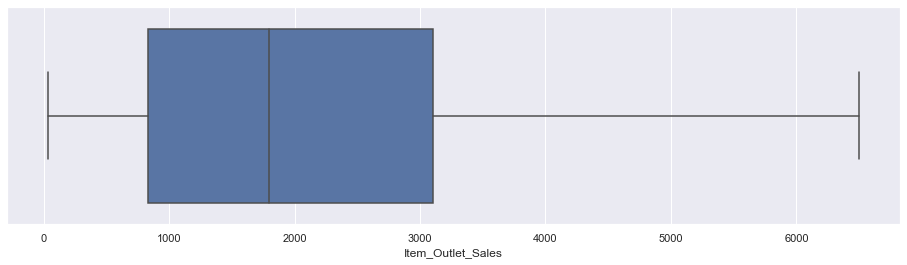

In [10]:
# Function for IQR
def handle_outliers(DataFrame,feature):
    IQR=DataFrame[feature].quantile(0.75)-DataFrame[feature].quantile(0.25)
    lower_limit=DataFrame[feature].quantile(0.25)-(IQR*1.5)
    upper_limit=DataFrame[feature].quantile(0.75)+(IQR*1.5)
    
    # replace the outliers with the upper and lower limit.
    DataFrame.loc[DataFrame[feature]>=upper_limit,feature]=upper_limit
    DataFrame.loc[DataFrame[feature]<=lower_limit,feature]=lower_limit
    
    return DataFrame[feature]

for i in num_cols:
    Big_mart[i] = handle_outliers(Big_mart,i)

#After handling outliers
for column in num_cols:
    plt.figure(figsize=(16, 4))
    sb.boxplot(Big_mart[column])

Now all the features don't have any outliers.

### Features selection

In [11]:
Big_mart
d = Big_mart
d = d.drop(['Item_Identifier','Outlet_Identifier',],axis = 1)
d

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,11.60,Low fat,0.066132,Soft Drinks,141.62,2002.0,Tier 2,Supermarket Type1,3829.02
1,11.60,Low fat,0.041178,Soft Drinks,140.32,2007.0,Tier 2,Supermarket Type1,2552.68
2,11.60,Low fat,0.040912,Soft Drinks,142.32,1987.0,Tier 3,Supermarket Type1,2552.68
3,11.60,Low fat,0.066132,Soft Drinks,141.92,2004.0,Tier 2,Supermarket Type1,992.71
4,11.60,Low fat,0.041113,Soft Drinks,142.02,2009.0,Tier 3,Supermarket Type2,850.89
...,...,...,...,...,...,...,...,...,...
8518,14.65,Low fat,0.083359,Household,161.96,1997.0,Tier 1,Supermarket Type1,4711.20
8519,14.65,Low fat,0.083699,Household,163.46,2009.0,Tier 3,Supermarket Type2,2599.28
8520,14.65,Low fat,0.083528,Household,162.46,2002.0,Tier 2,Supermarket Type1,2274.37
8521,14.65,Low fat,0.066132,Household,161.56,1998.0,Tier 3,Grocery Store,324.91


In [12]:
#Target variable
Y = d[['Item_Outlet_Sales']]

**Transform y to normally distributed.**

c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

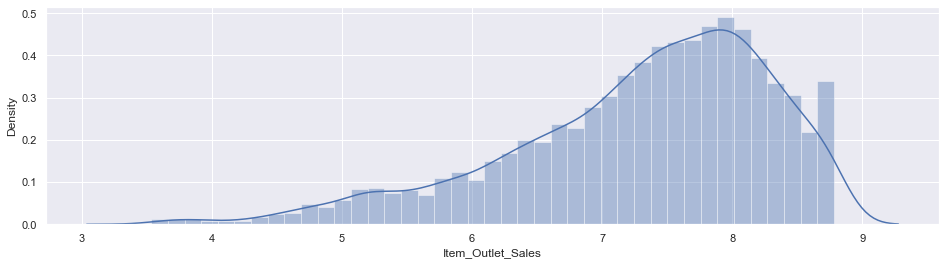

In [13]:
#log function

plt.figure(figsize=(16, 4))
sb.distplot(np.log(Y['Item_Outlet_Sales']+1))

c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

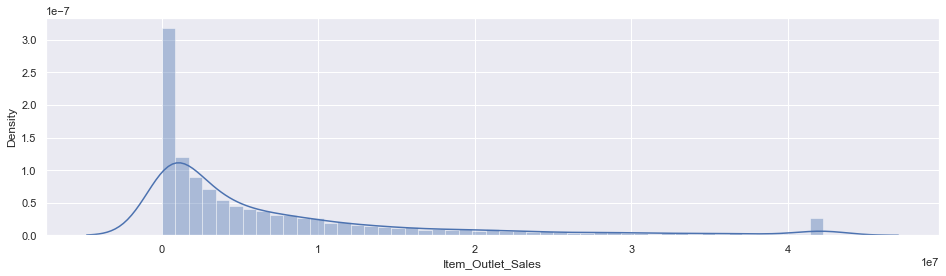

In [14]:
# square function

plt.figure(figsize=(16, 4))
sb.distplot(Y['Item_Outlet_Sales']**(2))

c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

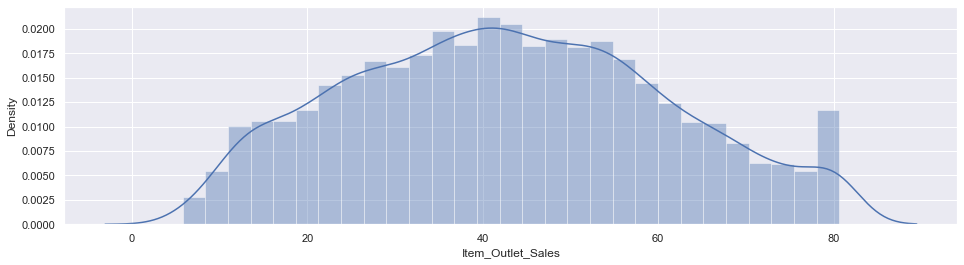

In [15]:
#square root function 

plt.figure(figsize=(16, 4))
sb.distplot(Y['Item_Outlet_Sales']**(1/2))

In [16]:
Y['Item_Outlet_Sales'] =  Y['Item_Outlet_Sales']**(1/2)
Y

C:\Users\ZIAD\AppData\Local\Temp\ipykernel_7540\536162823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Item_Outlet_Sales'] =  Y['Item_Outlet_Sales']**(1/2)


,Item_Outlet_Sales
0,61.879076
1,50.524054
2,50.524054
3,31.507301
4,29.170019
...,...
8518,68.638182
8519,50.983134
8520,47.690355
8521,18.025260


The square root function transforms the item outlet sales into a normal distribution. 
So it will be used in the model instead of the original y.

**Selection of the most important features by their coefficients and P-value.**

In [17]:
#get the dummies variables

data_types = d.dtypes
for cols in d.columns:
    if data_types[cols]==data_types['Outlet_Type']:
        temp = pd.get_dummies(d[cols],drop_first=True)
        d.drop(cols,axis=1,inplace=True)
        d = pd.concat([d,temp],axis=1)

In [18]:
d.drop(['Item_Outlet_Sales'],axis = 1,inplace =True)
d

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,...,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,11.60,0.066132,141.62,2002.0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,11.60,0.041178,140.32,2007.0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,11.60,0.040912,142.32,1987.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
3,11.60,0.066132,141.92,2004.0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,11.60,0.041113,142.02,2009.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,14.65,0.083359,161.96,1997.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,14.65,0.083699,163.46,2009.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8520,14.65,0.083528,162.46,2002.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8521,14.65,0.066132,161.56,1998.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
#test the model to select the most reliable and important features.

d['intercept'] = 1
lm_bath = sms.OLS(Y, d)
results_bath = lm_bath.fit()
results_bath.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     657.0
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:22:01   Log-Likelihood:                -32148.
No. Observations:                8523   AIC:                         6.435e+04
Df Residuals:                    8497   BIC:                         6.453e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Weight                  -0.0033      0.025     -0.132      0.895      -0.052       0.045
Item_Visibility              -1.7846      2.620     -0.681      0.496      -6.920       3.351
Item_MRP                      0.1629      0.002     88.323      0.000       0.159       0.167
Outlet_Establishment_Year     0.0419      0.030      1.388      0.165      -0.017       0.101
Regular                       0.4999      0.264      1.892      0.059      -0.018       1.018
Breads                        0.2825      0.784      0.360      0.719      -1.255       1.820
Breakfast                    -0.7981      1.088     -0.734      0.463      -2.930       1.334
Canned                        0.4031      0.586      0.688      0.491      -0.745       1.551
Dairy                        -1.0929      0.580     -1.883      0.060      -2.231       0.045
Frozen Foods                 -0.6358      0.549     -1.158      0.247      -1.712       0.441
Fruits and Vegetables         0.0143      0.513      0.028      0.978      -0.991       1.020
Hard Drinks                  -0.0171      0.840     -0.020      0.984      -1.665       1.630
Health and Hygiene            0.0781      0.634      0.123      0.902      -1.164       1.320
Household                    -0.3651      0.558     -0.654      0.513      -1.459       0.729
Meat                          0.1601      0.659      0.243      0.808      -1.132       1.452
Others                        0.1048      0.920      0.114      0.909      -1.698       1.908
Seafood                       1.2938      1.381      0.937      0.349      -1.413       4.000
Snack Foods                  -0.0664      0.515     -0.129      0.898      -1.077       0.944
Soft Drinks                  -0.5253      0.654     -0.803      0.422      -1.807       0.757
Starchy Foods                -0.2204      0.962     -0.229      0.819      -2.105       1.665
Tier 2                       -0.3099      0.404     -0.767      0.443      -1.102       0.482
Tier 3                       -0.2476      0.370     -0.669      0.504      -0.974       0.478
Supermarket Type1            27.7709      0.399     69.639      0.000      26.989      28.553
Supermarket Type2            23.8831      0.769     31.039      0.000      22.375      25.391
Supermarket Type3            40.4504      0.531     76.179      0.000      39.410      41.491
intercept                   -88.6437     60.116     -1.475      0.140    -206.486      29.199
==============================================================================
Omnibus:                      112.328   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.097
Skew:                          -0.248   Prob(JB):                     1.86e-27
Kurtosis:                       3.316   C

**The Item MRP, Supermarket Type1, Supermarket Type2, and Supermarket Type3 have high coefficients and their P-values are less than 0.05. So these features are statistically significant.**

In [20]:
#Drop the unimportant features.

Big_mart = Big_mart.drop(['Item_Identifier',
'Outlet_Identifier',
'Item_Weight',
'Item_Visibility',
'Outlet_Establishment_Year',
'Outlet_Location_Type',
'Item_Type',
'Item_Fat_Content'
,'Item_Outlet_Sales'],axis = 1)
Big_mart

,Item_MRP,Outlet_Type
0,141.62,Supermarket Type1
1,140.32,Supermarket Type1
2,142.32,Supermarket Type1
3,141.92,Supermarket Type1
4,142.02,Supermarket Type2
...,...,...
8518,161.96,Supermarket Type1
8519,163.46,Supermarket Type2
8520,162.46,Supermarket Type1
8521,161.56,Grocery Store


### Dummy variables

In [21]:
temp = pd.get_dummies(Big_mart['Outlet_Type'],drop_first=True)
Big_mart.drop(['Outlet_Type'],axis=1,inplace=True)
Big_mart = pd.concat([Big_mart,temp],axis=1)
Big_mart

,Item_MRP,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,141.62,1,0,0
1,140.32,1,0,0
2,142.32,1,0,0
3,141.92,1,0,0
4,142.02,0,1,0
...,...,...,...,...
8518,161.96,1,0,0
8519,163.46,0,1,0
8520,162.46,1,0,0
8521,161.56,0,0,0


### Standardization 

In [22]:
#Standardize the features to have the same scale around mean = 0

scaler = preprocessing.StandardScaler().fit(Big_mart)
X_scaled = scaler.transform(Big_mart)
X_scaled

array([[ 0.01007077,  0.72680189, -0.34955064, -0.35102831],
       [-0.01080555,  0.72680189, -0.34955064, -0.35102831],
       [ 0.02131186,  0.72680189, -0.34955064, -0.35102831],
       ...,
       [ 0.34473426,  0.72680189, -0.34955064, -0.35102831],
       [ 0.33028143, -1.37589075, -0.34955064, -0.35102831],
       [ 0.3206462 , -1.37589075, -0.34955064, -0.35102831]])

## Model Building

In [23]:
#Split the data to train and test set.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, random_state=0, test_size=0.25, shuffle=True)

### 1) DecisionTreeRegressor

In [24]:
dregr = DecisionTreeRegressor(criterion='mse',max_depth=5)
dregr.fit(X_train,y_train)

c:\Users\ZIAD\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=5)

In [25]:
dregr_pred = dregr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, dregr_pred))
print('MSE:', mean_squared_error(y_test, dregr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dregr_pred)))
print('R2 score:', r2_score(y_test, dregr_pred))

MAE: 7.835819854716784
MSE: 103.86383861083961
RMSE: 10.191360979321633
R2 score: 0.6873985439047887


In [26]:
print(y_test.mean())
print(dregr_pred.mean())

Item_Outlet_Sales    43.069877
dtype: float64
42.693144854148734


c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

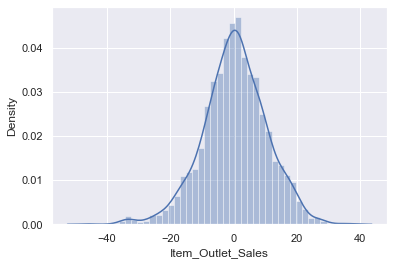

In [27]:
# The distribution of the difference between the predicted and the actual y.

sb.distplot(y_test['Item_Outlet_Sales']-dregr_pred)

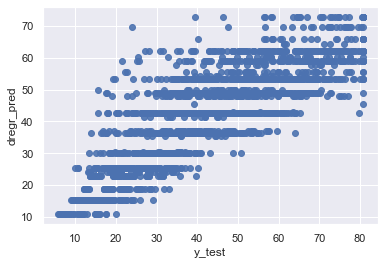

In [28]:
# Scatter between the actual y and the predicted y.

plt.scatter(y_test['Item_Outlet_Sales'], dregr_pred, alpha = 0.9)
plt.xlabel("y_test")
plt.ylabel("dregr_pred")
plt.show()

### 2) RandomForestRegressor

In [29]:
rf_model = RandomForestRegressor(n_estimators=1000,max_depth=5)
rf_model.fit(X_train, y_train)

C:\Users\ZIAD\AppData\Local\Temp\ipykernel_7540\3651677857.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, n_estimators=1000)

In [30]:
rf_pred = rf_model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2 score:', r2_score(y_test, rf_pred))

MAE: 7.7756183348567935
MSE: 101.77609629183533
RMSE: 10.088413963147792
R2 score: 0.6936820714308378


In [31]:
print(y_test.mean())
print(rf_pred.mean())

Item_Outlet_Sales    43.069877
dtype: float64
42.69898243747225


c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

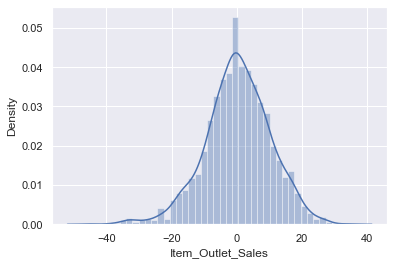

In [32]:
# The distribution of the difference between the predicted and the actual y.

sb.distplot(y_test['Item_Outlet_Sales']-rf_pred)

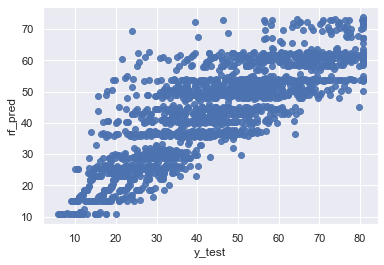

In [33]:
# Scatter between the actual y and the predicted y.

plt.scatter(y_test['Item_Outlet_Sales'], rf_pred, alpha = 0.9)
plt.xlabel("y_test")
plt.ylabel("rf_pred")
plt.show()

### 3) XGBRegressor

In [34]:
xgb_model=XGBRegressor(n_estimators=1000, learning_rate=0.05,objective="reg:squarederror",max_depth=5)
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

c:\Users\ZIAD\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [35]:
xgb_pred=xgb_model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, xgb_pred))
print('MSE:', mean_squared_error(y_test, xgb_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, xgb_pred)))
print('R2 score:', r2_score(y_test, xgb_pred))

MAE: 7.912098775716618
MSE: 103.99481393843845
RMSE: 10.197784756428156
R2 score: 0.6870043443578862


In [36]:
print(y_test.mean())
print(xgb_pred.mean())

Item_Outlet_Sales    43.069877
dtype: float64
42.237537


c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

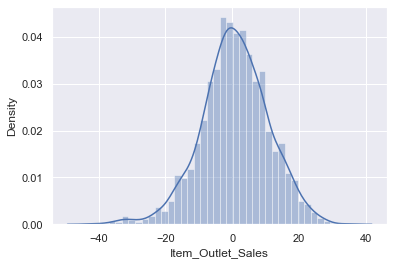

In [37]:
# The distribution of the difference between the predicted and the actual y.

sb.distplot(y_test['Item_Outlet_Sales']-xgb_pred)

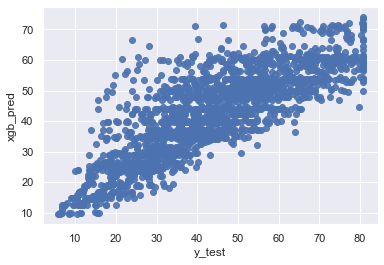

In [38]:
# Scatter between the actual y and the predicted y.

plt.scatter(y_test['Item_Outlet_Sales'], xgb_pred, alpha = 0.9)
plt.xlabel("y_test")
plt.ylabel("xgb_pred")
plt.show()

### 4) LinearRegression

In [100]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [101]:
lr_pred=lr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, lr_pred))
print('MSE:', mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2 score:', r2_score(y_test, lr_pred))

MAE: 8.259310810551707
MSE: 109.40677152908192
RMSE: 10.459769191004261
R2 score: 0.6707158473623196


In [102]:
print(y_test.mean())
print(lr_pred.mean())

Item_Outlet_Sales    43.069877
dtype: float64
42.67423963049394


c:\Users\ZIAD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

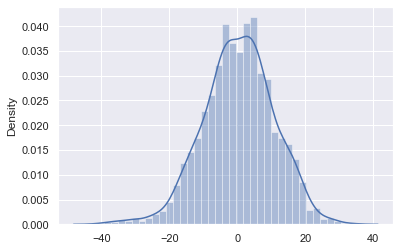

In [103]:
# The distribution of the difference between the predicted and the actual y.

sb.distplot(y_test-lr_pred)

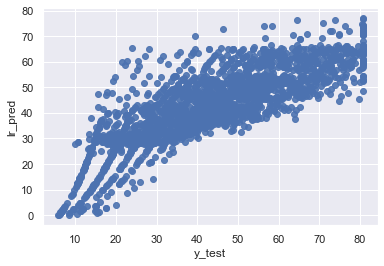

In [104]:
# Scatter between the actual y and the predicted y.

plt.scatter(y_test, lr_pred, alpha = 0.9)
plt.xlabel("y_test")
plt.ylabel("lr_pred")
plt.show()

* All the models have high R-square and low MSE and MAE but the RandomForestRegressor is the best model.
* RandomForestRegressor has R-square = 69.3%, which means that these features explained 69.3% of the variation in the item outlet sales.
